In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from RobotSim373 import *

Version:  0.0.22


In [16]:
def build(robot):
    Box(robot,x=10,y=5,width=3,height=1,name='bob')

In [20]:
def force_up(t,robot):
    robot['bob'].F=10
    robot['bob'].F_angle=90

def force_down(t,robot):
    robot['bob'].F=10
    robot['bob'].F_angle=-90
    
def close_to_ceiling(t,robot):
    if robot['bob'].y>20:
        return True
    
def close_to_floor(t,robot):
    if robot['bob'].y<5:
        return True
    

In [21]:
state_machine=StateMachine(
    {
     'move_up':([force_up,close_to_ceiling],'move_down'),
     'move_down':([force_down,close_to_floor],'move_up'),
    },
    first_state='move_up'
)

def monitor(t,robot):
    robot.message=robot.controller.current_state  

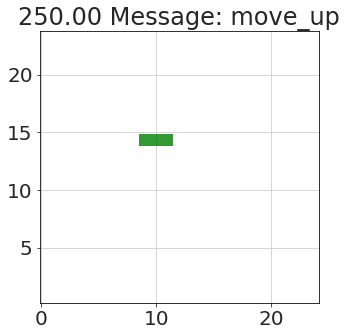

In [25]:
env=Environment(width=24,height=24,linearDamping=20) 
robot=Robot(env)
build(robot)

robot.controller=Controller(robot,state_machine)
robot.controller.monitor=monitor


run_sim(env,robot.controller,
        total_time=250,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        figure_width=5,
        plot_orientation=False,
       )    
